In [1]:
import numpy as np
from skimage import io
from pathlib import Path
import re
#import ants
from skimage.transform import resize
from tqdm import tqdm
from skimage.morphology import skeletonize_3d, binary_closing
from scipy.ndimage import distance_transform_edt, binary_dilation
import tifffile as tif
from scipy.ndimage import binary_fill_holes
import cc3d
from scipy.io import loadmat, savemat
import sknw
import networkx as nx
import pickle
import os
from skimage.filters import threshold_otsu
from skimage.filters import rank
from skimage.morphology import ball
import matplotlib.pyplot as plt
import pandas as pd
import time
import scipy as sp
import vg
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from pytransform3d.rotations import matrix_from_axis_angle
import multiprocessing
from scipy.ndimage import convolve as conv
from scipy.stats import multivariate_normal
from skimage import color, data, restoration
#from RedLionfishDeconv import doRLDeconvolutionFromNpArrays
from matplotlib.patches import Circle
from skimage.feature import peak_local_max
from statistics import mode
import imageio
from PIL import Image
from PIL.TiffTags import TAGS
from tifffile import TiffFile
from tifffile.tifffile import imagej_description_metadata
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score
import napari
from filelock import Timeout, FileLock
from scipy import ndimage as ndi
from scipy.interpolate import NearestNDInterpolator
from statsmodels.stats.anova import AnovaRM 
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scikit_posthocs as sph
import pingouin as pg
from IPython.display import display
import statannot
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

plt.rcParams['figure.figsize'] = [10, 10]

In [10]:
def remove_small_comps_3d(image, thresh = 500):
    """

    Parameters
    ----------
    image : binary np array with uint8 elements
        3d numpy matrix, connected components will be removed form this image
    thresh : int64
        smallest connected components to keep

    Returns
    -------
    np.array with uint8 elements, binary
        binary image with connected components below the threshold removed.

    """
    img_lab, N = cc3d.connected_components(image,return_N=True)
    unique, counts = np.unique(img_lab, return_counts=True)
    unique_keep = unique[counts>thresh]
    unique_keep = np.delete(unique_keep,[0])
    img_filt = np.zeros(img_lab.shape).astype('int8')
    img_filt[np.isin(img_lab,unique_keep)] = 1
    return img_filt.astype('uint8')   

def fill_holes(img,thresh=1000):
    #res = np.zeros(img.shape)
    for i in np.unique(img)[::-1]:
        _tmp = (img==i)*1.0
        _tmp = _tmp.astype('int8')
        _tmp = remove_small_comps_3d(_tmp,thresh=thresh)
        img[_tmp==1] = i
    res = img.astype('int8')
    return res

In [19]:
folder = Path('/home/rozakmat/projects/def-mgoubran/pargyline_patches')
files = folder.glob('*.npy')
files = list(files)
files = [x.as_posix() for x in files]
files

['/home/rozakmat/projects/def-mgoubran/pargyline_patches/patch_7_428_tony_pred.npy',
 '/home/rozakmat/projects/def-mgoubran/pargyline_patches/patch_7_452_tony_pred.npy',
 '/home/rozakmat/projects/def-mgoubran/pargyline_patches/patch_7_419_tony_pred.npy',
 '/home/rozakmat/projects/def-mgoubran/pargyline_patches/patch_7_463_tony_pred.npy',
 '/home/rozakmat/projects/def-mgoubran/pargyline_patches/patch_7_430_tony_pred.npy',
 '/home/rozakmat/projects/def-mgoubran/pargyline_patches/patch_7_401_tony_pred.npy']

/tmp/ipykernel_3053161/2816702729.py:8: UserWarning: /home/rozakmat/projects/def-mgoubran/pargyline_patches_matt/patch_7_428_tony_pred_matt_filt.tif is a low contrast image
  io.imsave(re.sub('pargyline_patches','pargyline_patches_matt',re.sub('.npy','_matt_filt.tif',file)),img)
/tmp/ipykernel_3053161/2816702729.py:9: UserWarning: /home/rozakmat/projects/def-mgoubran/pargyline_patches_matt/patch_7_428_tony_pred_matt_filt_mip.tif is a low contrast image
  io.imsave(re.sub('pargyline_patches','pargyline_patches_matt',re.sub('.npy','_matt_filt_mip.tif',file)),np.max(img,axis=0))


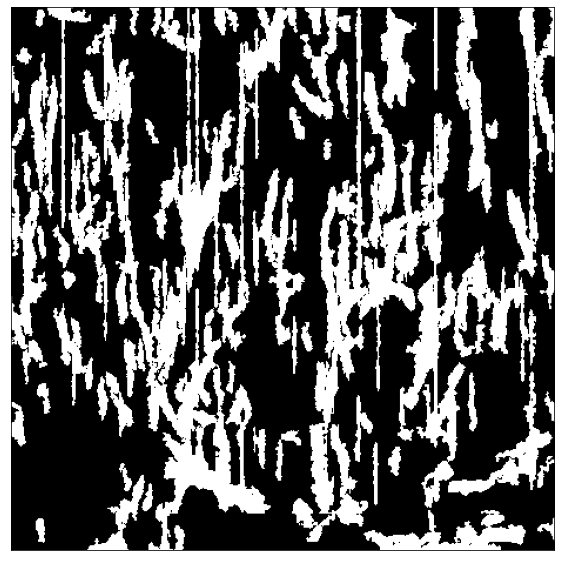

In [ ]:
for file in files:
    img = np.load(file)[0]
    img = remove_small_comps_3d(img, thresh = 500)
    plt.imshow(np.max(img,axis=0),cmap = 'binary_r')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(re.sub('pargyline_patches','pargyline_patches_matt',re.sub('.npy','_matt_filt.png',file)))
    io.imsave(re.sub('pargyline_patches','pargyline_patches_matt',re.sub('.npy','_matt_filt.tif',file)),img)
    io.imsave(re.sub('pargyline_patches','pargyline_patches_matt',re.sub('.npy','_matt_filt_mip.tif',file)),np.max(img,axis=0))
    plt.show()